# Comparative Analysis
In this notebook, we compare DDM with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
out_control_levels = list(range(15, 30 + 1))
methods = list()

for o in out_control_levels:
    candidate_name = f"{o}-out_control_level"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/ddm_out_control/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,15-out_control_level,16-out_control_level,17-out_control_level,18-out_control_level,19-out_control_level,20-out_control_level,21-out_control_level,22-out_control_level,23-out_control_level,24-out_control_level,25-out_control_level,26-out_control_level,27-out_control_level,28-out_control_level,29-out_control_level,30-out_control_level
0,DodgerLoopDay,0.500,0.586,0.684,0.683,0.337,0.741,0.586,0.586,0.586,0.745,0.591,0.591,0.514,0.505,0.425,0.425
1,EEGRat,0.702,0.682,0.495,0.655,0.582,0.582,0.585,0.595,0.664,0.660,0.665,0.516,0.521,0.521,0.520,0.495
2,EEGRat2,0.592,0.592,0.592,0.628,0.646,0.646,0.646,0.646,0.635,0.635,0.635,0.635,0.635,0.540,0.825,0.825
3,FaceFour,0.344,0.390,0.395,0.390,0.395,0.479,0.322,0.390,0.421,0.421,0.395,0.395,0.504,0.390,0.390,0.395
4,GrandMalSeizures2,0.647,0.669,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666,0.666
5,GreatBarbet1,0.710,0.713,0.563,0.567,0.639,0.641,0.640,0.640,0.634,0.593,0.593,0.592,0.633,0.633,0.633,0.557
6,Herring,0.564,0.360,0.360,0.360,0.446,0.806,0.805,0.806,0.805,0.805,0.805,0.694,0.694,0.694,0.806,0.805
7,InlineSkate,0.390,0.390,0.390,0.390,0.390,0.476,0.480,0.476,0.546,0.546,0.546,0.546,0.546,0.546,0.546,0.546
8,InsectEPG1,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.337,0.337,0.337,0.369,0.369,0.369,0.369,0.366,0.366,0.366,0.354,0.343,0.343,0.343,0.343,0.343


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4195/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


15-out_control_level    0.534
16-out_control_level    0.532
17-out_control_level    0.519
18-out_control_level    0.538
19-out_control_level    0.533
20-out_control_level    0.584
21-out_control_level    0.579
22-out_control_level    0.579
23-out_control_level    0.575
24-out_control_level    0.582
25-out_control_level    0.584
26-out_control_level    0.571
27-out_control_level    0.572
28-out_control_level    0.556
29-out_control_level    0.555
30-out_control_level    0.548
dtype: float64

In [6]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4195/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


15-out_control_level    0.143
16-out_control_level    0.146
17-out_control_level    0.145
18-out_control_level    0.144
19-out_control_level    0.136
20-out_control_level    0.151
21-out_control_level    0.160
22-out_control_level    0.173
23-out_control_level    0.171
24-out_control_level    0.174
25-out_control_level    0.171
26-out_control_level    0.165
27-out_control_level    0.161
28-out_control_level    0.153
29-out_control_level    0.159
30-out_control_level    0.172
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

15-out_control_level:wins=5 rank=8.19048
16-out_control_level:wins=6 rank=7.14286
17-out_control_level:wins=4 rank=8.33333
18-out_control_level:wins=5 rank=7.80952
19-out_control_level:wins=6 rank=6.90476
20-out_control_level:wins=7 rank=4.61905
21-out_control_level:wins=9 rank=4.38095
22-out_control_level:wins=7 rank=5.0
23-out_control_level:wins=6 rank=5.19048
24-out_control_level:wins=6 rank=4.80952
25-out_control_level:wins=5 rank=4.71429
26-out_control_level:wins=5 rank=5.57143
27-out_control_level:wins=5 rank=5.66667
28-out_control_level:wins=5 rank=6.42857
29-out_control_level:wins=7 rank=6.09524
30-out_control_level:wins=6 rank=7.2381


Let's plot and output the ranks.

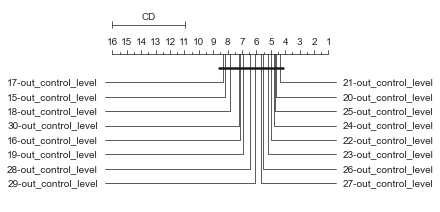

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5,
                                      filename="../../figures/cd_ablation_ddm_out_control.pdf")

Let's compute pairwise wins/losses.

In [10]:
selection = "20-out_control_level"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

20-out_control_level vs 15-out_control_level: (wins/ties/losses): 11/6/4
20-out_control_level vs 16-out_control_level: (wins/ties/losses): 10/6/5
20-out_control_level vs 17-out_control_level: (wins/ties/losses): 12/7/2
20-out_control_level vs 18-out_control_level: (wins/ties/losses): 9/8/4
20-out_control_level vs 19-out_control_level: (wins/ties/losses): 7/11/3
20-out_control_level vs 21-out_control_level: (wins/ties/losses): 4/9/8
20-out_control_level vs 22-out_control_level: (wins/ties/losses): 8/9/4
20-out_control_level vs 23-out_control_level: (wins/ties/losses): 11/5/5
20-out_control_level vs 24-out_control_level: (wins/ties/losses): 9/5/7
20-out_control_level vs 25-out_control_level: (wins/ties/losses): 10/5/6
20-out_control_level vs 26-out_control_level: (wins/ties/losses): 11/5/5
20-out_control_level vs 27-out_control_level: (wins/ties/losses): 10/5/6
20-out_control_level vs 28-out_control_level: (wins/ties/losses): 11/4/6
20-out_control_level vs 29-out_control_level: (wins/tie

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4195/2462818768.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4195/2462818768.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


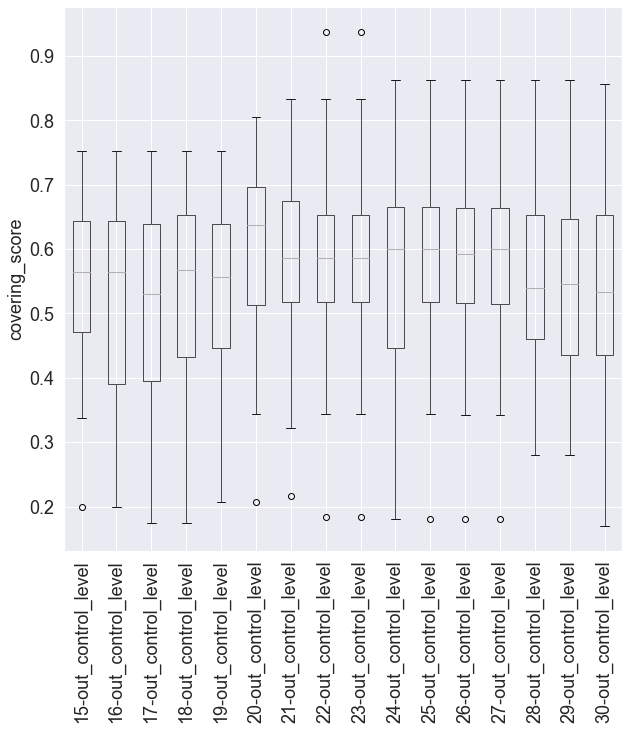

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig("../../figures/bp_ablation_ddm_out_control.pdf", bbox_inches="tight")